In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('Salary_Data.csv')

In [ ]:
data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.tail(5)

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [ ]:
data.shape

(30, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data[data.duplicated].shape##no duplicates

(0, 2)

In [ ]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
##scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
array = data.values
scaler = MinMaxScaler(feature_range = (0,1))
rescaledX = scaler.fit_transform(array)

In [ ]:
rescaledX = np.array(rescaledX)

# Create a new data frame from the rescaledX array
data_scaled = pd.DataFrame(rescaledX, columns=data.columns)

In [ ]:
data_scaled.head(5)

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


<Axes: xlabel='Salary', ylabel='YearsExperience'>

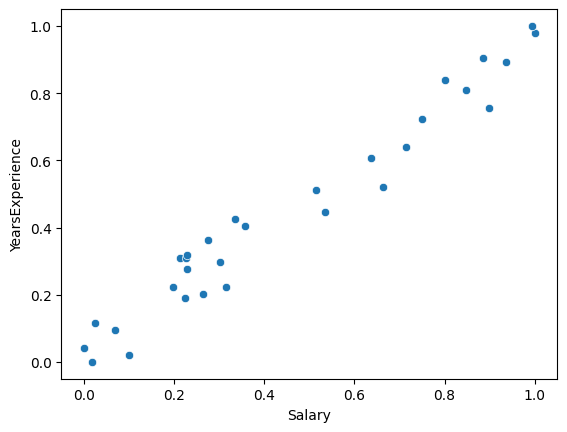

In [ ]:
sns.scatterplot(x=data_scaled['Salary'],y = data_scaled['YearsExperience'])

In [ ]:
data_scaled.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
##fitting a model

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
first_model = smf.ols('Salary~YearsExperience',data = data_scaled).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

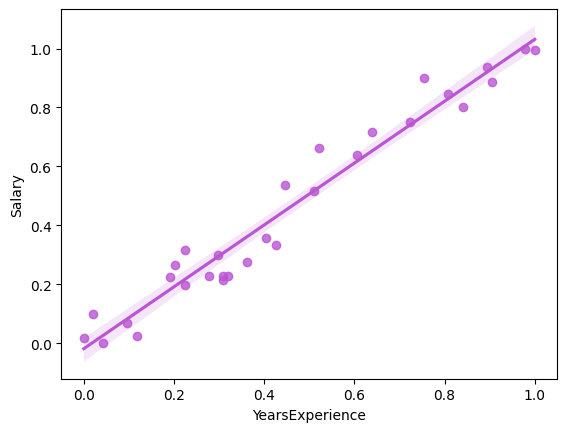

In [ ]:
sns.regplot(x = 'YearsExperience', y = 'Salary' , data = data_scaled , color = '#ba55d3')

In [ ]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        03:49:32   Log-Likelihood:                 38.951
No. Observations:                  30   AIC:                            -73.90
Df Residuals:                      28   BIC:                            -71.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0182      0.023     -0.807      0.427      -0.065       0.028
YearsExperience     1.0493      0.042     24.950      0.000       0.963       1.135
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
value = pd.array([4,4.5,6,12],np.float64)
pred_df = pd.DataFrame(value,columns = ['YearsExperience'])

In [ ]:
pred_df

,YearsExperience
0,4.0
1,4.5
2,6.0
3,12.0


In [ ]:
first_model.predict(pred_df)

0     4.178771
1     4.703397
2     6.277274
3    12.572784
dtype: float64

In [ ]:
mse = first_model.mse_resid

In [ ]:
root_mse = np.sqrt(mse)

In [ ]:
print("root_mean_squared_error is",root_mse)

root_mean_squared_error is 0.06837130936828954


In [ ]:
first_model.predict()

array([-0.01823578,  0.00408872,  0.02641323,  0.08222448,  0.10454899,
        0.18268475,  0.193847  ,  0.21617151,  0.21617151,  0.27198276,
        0.29430727,  0.30546952,  0.30546952,  0.31663177,  0.36128078,
        0.40592978,  0.42825429,  0.45057879,  0.5175523 ,  0.52871455,
        0.61801257,  0.65149932,  0.74079734,  0.77428409,  0.83009535,
        0.86358211,  0.91939336,  0.93055562,  1.00869138,  1.03101588])

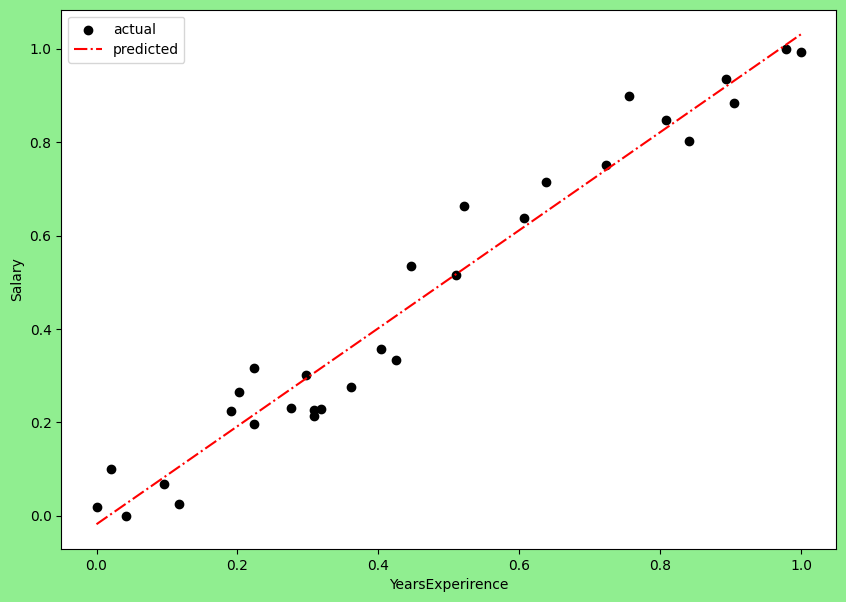

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7),facecolor = "lightgreen")
plt.scatter(data_scaled['YearsExperience'],data_scaled['Salary'],color = 'black',label = 'actual')
plt.plot(data_scaled['YearsExperience'],first_model.predict(),label = 'predicted',color = 'red',linestyle = '-.')
plt.xlabel('YearsExperirence')
plt.ylabel('Salary')
plt.legend(loc = 'best')
plt.show()

In [ ]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           3.25e-13
Time:                        03:49:32   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [ ]:
model2.resid

0     20547.151661
1     20629.764808
2      6348.448095
3       467.737694
4     -7034.138875
5     -1494.050079
6       638.157559
7     -7685.943929
8      2314.056071
9    -10833.718504
10    -6941.105863
11   -15392.552842
12   -14229.552842
13   -15107.628149
14   -14855.422577
15   -11484.295729
16   -15016.791737
17      481.170118
18    -5596.066704
19     6298.867023
20     -982.502137
21     3800.485304
22     2496.628610
23    13494.081316
24     6711.079249
25     1486.286888
26    10679.131565
27     5920.185400
28    12819.992753
29    11520.545855
dtype: float64

In [ ]:
model2.predict()

array([ 18795.84833932,  25575.23519175,  31382.55190541,  43057.2623059 ,
        46925.13887516,  58136.05007933,  59511.84244125,  62130.943929  ,
        62130.943929  ,  68022.71850448,  70159.10586295,  71186.55284173,
        71186.55284173,  72188.62814857,  75966.42257661,  79422.29572936,
        81045.79173698,  82606.82988239,  86959.06670394,  87641.13297709,
        92720.50213746,  94472.51469629,  98805.37138951, 100317.91868441,
       102719.92075053, 104095.71311245, 106289.86843506, 106714.81460019,
       109571.00724698, 110351.45414519])

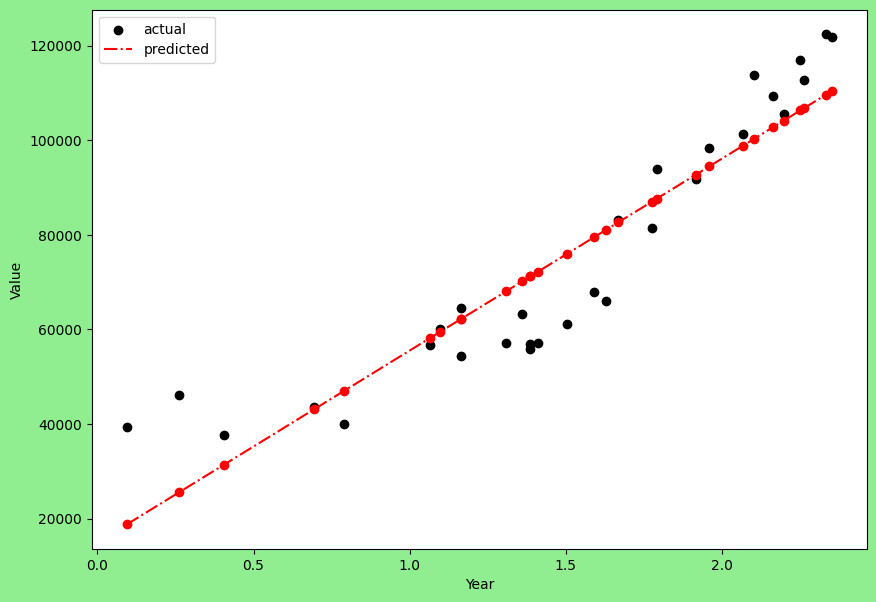

In [ ]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(np.log(data['YearsExperience']),data['Salary'],color="black",label="actual")
plt.plot(np.log(data['YearsExperience']),model2.predict(),label="predicted",color="red",linestyle="-.")
plt.scatter(np.log(data['YearsExperience']),model2.predict(),color="red")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc="best")
plt.show()

In [ ]:
model3 = smf.ols('np.log(Salary)~YearsExperience',data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           7.03e-18
Time:                        03:49:33   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [ ]:
model3.resid

0    -0.065327
1     0.070353
2    -0.157344
3    -0.077217
4    -0.189492
5     0.073291
6     0.120836
7    -0.003905
8     0.164716
9    -0.017461
10    0.057676
11   -0.079792
12   -0.059162
13   -0.069532
14   -0.051493
15    0.004230
16   -0.049362
17    0.155353
18    0.059102
19    0.190292
20    0.066210
21    0.097387
22    0.027382
23    0.106188
24    0.004207
25   -0.069235
26   -0.029540
27   -0.079842
28   -0.084591
29   -0.113931
dtype: float64

In [ ]:
model3.predict()

array([10.64540007, 10.67049065, 10.69558123, 10.75830768, 10.78339825,
       10.87121528, 10.88376056, 10.90885114, 10.90885114, 10.97157759,
       10.99666816, 11.00921345, 11.00921345, 11.02175874, 11.0719399 ,
       11.12212105, 11.14721163, 11.17230221, 11.24757394, 11.26011923,
       11.36048154, 11.39811741, 11.49847972, 11.53611559, 11.59884203,
       11.6364779 , 11.69920434, 11.71174963, 11.79956666, 11.82465723])

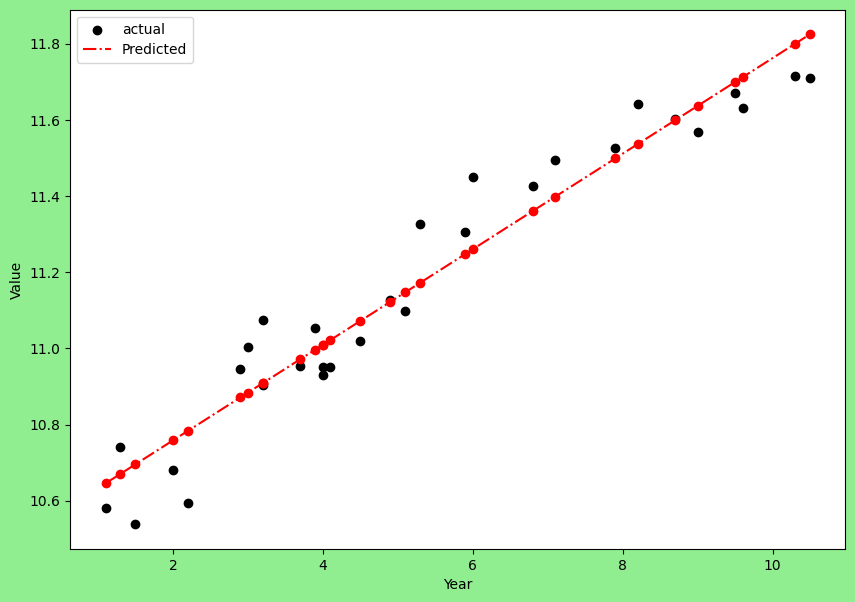

In [ ]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data['YearsExperience'],np.log(data['Salary']),color="black",label="actual")
plt.plot(data['YearsExperience'],model3.predict(),label="Predicted",color="red",linestyle="-.")
plt.scatter(data['YearsExperience'],model3.predict(),color="red")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc="best")
plt.show()

In [ ]:
data["YearsExperience_2"] = data['YearsExperience'] ** 2
model_quad = smf.ols("np.log(Salary)~YearsExperience+YearsExperience_2",data = data).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           3.95e-18
Time:                        03:49:33   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience       0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_2    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_quad.params

Intercept            10.336852
YearsExperience       0.202382
YearsExperience_2    -0.006614
dtype: float64

In [ ]:
model_quad.resid

0     0.028604
1     0.152073
2    -0.087306
3    -0.034070
4    -0.156176
5     0.076368
6     0.120122
7    -0.011804
8     0.156817
9    -0.041007
10    0.028796
11   -0.111140
12   -0.090510
13   -0.103216
14   -0.093198
15   -0.043380
16   -0.099130
17    0.103956
18    0.005990
19    0.137358
20    0.019455
21    0.055132
22    0.002946
23    0.090617
24    0.006057
25   -0.055346
26    0.007059
27   -0.038304
28   -0.004776
29   -0.021989
dtype: float64

In [ ]:
model_quad.predict()

array([10.55146893, 10.58877076, 10.62554351, 10.71516063, 10.75008158,
       10.86813838, 10.88447456, 10.91675009, 10.91675009, 10.99512419,
       11.02554794, 11.0405614 , 11.0405614 , 11.0554426 , 11.11364467,
       11.16973041, 11.19697966, 11.22369982, 11.30068581, 11.31305386,
       11.40723651, 11.44037254, 11.52291536, 11.55168645, 11.59699285,
       11.62258944, 11.66260501, 11.67021131, 11.71975183, 11.73271583])

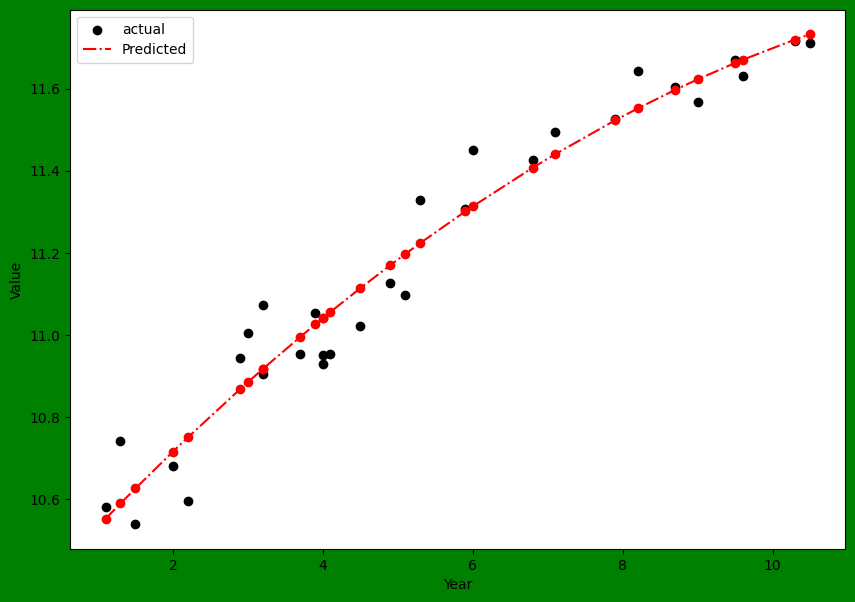

In [ ]:
plt.figure(figsize=(10,7),facecolor="green")
plt.scatter(data['YearsExperience'],np.log(data['Salary']),color="black",label="actual")
plt.plot(data['YearsExperience'],model_quad.predict(),label="Predicted",color="red",linestyle="-.")
plt.scatter(data['YearsExperience'],model_quad.predict(),color="red")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc="best")
plt.show()

In [ ]:
data_sqrt = np.sqrt(data['Salary'])
model_sqrt = smf.ols("data_sqrt~YearsExperience",data = data).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              data_sqrt   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           9.78e-20
Time:                        03:59:42   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_sqrt.params

Intercept          180.700221
YearsExperience     17.056532
dtype: float64

In [ ]:
model_sqrt.resid

0     -1.111707
1     12.079770
2    -12.040328
3     -6.186825
4    -18.497278
5      7.831634
6     13.385152
7     -1.946600
8     18.579074
9     -4.667173
10     4.211203
11   -12.718814
12   -10.269692
13   -11.715699
14   -10.248224
15    -3.628039
16   -10.727448
17    17.150050
18     3.908242
19    23.456916
20     6.198176
21    11.683648
22     2.832927
23    16.796557
24     1.711517
25    -9.275170
26    -0.729966
27    -8.831547
28    -6.538250
29   -10.692104
dtype: float64

In [ ]:
model_sqrt.predict()

array([199.46240666, 202.87371307, 206.28501948, 214.81328551,
       218.22459192, 230.16416435, 231.86981756, 235.28112397,
       235.28112397, 243.80938999, 247.2206964 , 248.92634961,
       248.92634961, 250.63200281, 257.45461563, 264.27722845,
       267.68853486, 271.09984127, 281.3337605 , 283.03941371,
       296.68463935, 301.80159896, 315.4468246 , 320.56378422,
       329.09205024, 334.20900986, 342.73727588, 344.44292909,
       356.38250152, 359.79380793])

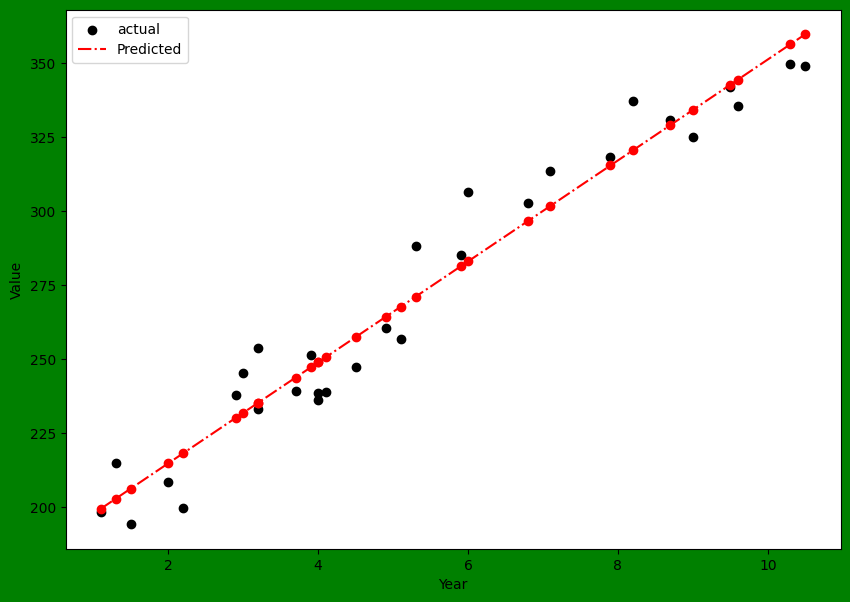

In [ ]:
plt.figure(figsize=(10,7),facecolor="green")
plt.scatter(data['YearsExperience'],data_sqrt,color="black",label="actual")
plt.plot(data['YearsExperience'],model_sqrt.predict(),label="Predicted",color="red",linestyle="-.")
plt.scatter(data['YearsExperience'],model_sqrt.predict(),color="red")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc="best")
plt.show()

In [ ]:
data_cube = np.cbrt(data['Salary'])
model_cbrt = smf.ols("data_cube~YearsExperience",data = data).fit()
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              data_cube   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     482.5
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           3.42e-19
Time:                        04:03:45   Log-Likelihood:                -47.463
No. Observations:                  30   AIC:                             98.93
Df Residuals:                      28   BIC:                             101.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.4539      0.479     67.821      0.000      31.474      33.434
YearsExperience     1.7515      0.080     21.966      0.000       1.588       1.915
==============================================================================
Omnibus:                        2.131   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.611
Skew:                           0.385   Prob(JB):                        0.447
Kurtosis:                       2.166   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_cbrt.resid

0    -0.369240
1     1.152850
2    -1.540835
3    -0.780821
4    -2.138673
5     0.871142
6     1.472997
7    -0.157395
8     2.033924
9    -0.406805
10    0.551816
11   -1.248093
12   -0.984415
13   -1.131661
14   -0.946647
15   -0.231927
16   -0.968045
17    1.899460
18    0.544485
19    2.495996
20    0.736816
21    1.257830
22    0.325984
23    1.645485
24    0.139782
25   -0.953155
26   -0.187422
27   -0.974210
28   -0.844326
29   -1.264899
dtype: float64

In [ ]:
model_cbrt.params

Intercept          32.453864
YearsExperience     1.751471
dtype: float64

In [ ]:
model_cbrt.predict()

array([34.38048174, 34.73077585, 35.08106995, 35.95680521, 36.30709931,
       37.53312867, 37.70827572, 38.05856982, 38.05856982, 38.93430508,
       39.28459918, 39.45974623, 39.45974623, 39.63489328, 40.33548149,
       41.0360697 , 41.3863638 , 41.7366579 , 42.78754021, 42.96268726,
       44.36386367, 44.88930483, 46.29048124, 46.81592239, 47.69165765,
       48.2170988 , 49.09283406, 49.26798111, 50.49401047, 50.84430457])

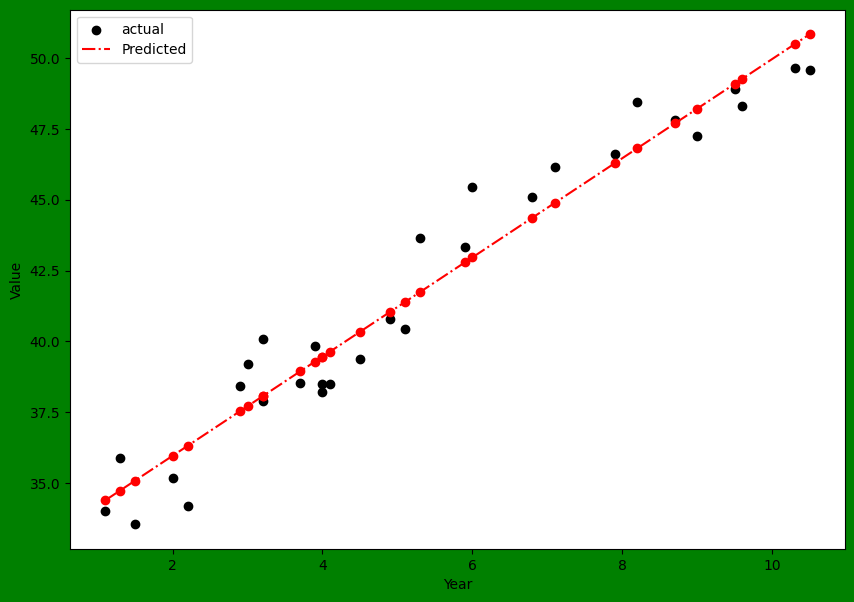

In [ ]:
plt.figure(figsize=(10,7),facecolor="green")
plt.scatter(data['YearsExperience'],data_cube,color="black",label="actual")
plt.plot(data['YearsExperience'],model_cbrt.predict(),label="Predicted",color="red",linestyle="-.")
plt.scatter(data['YearsExperience'],model_cbrt.predict(),color="red")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc="best")
plt.show()

**Best Model**

In [ ]:
Best_model = smf.ols('Salary~YearsExperience',data = data_scaled).fit()
Best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        04:10:11   Log-Likelihood:                 38.951
No. Observations:                  30   AIC:                            -73.90
Df Residuals:                      28   BIC:                            -71.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0182      0.023     -0.807      0.427      -0.065       0.028
YearsExperience     1.0493      0.042     24.950      0.000       0.963       1.135
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Best Model Parameters**

In [ ]:
Best_model.params

Intercept         -0.018236
YearsExperience    1.049252
dtype: float64

In [ ]:
Best_model.resid

0     0.037277
1     0.096006
2    -0.026413
3    -0.013786
4    -0.079035
5     0.040691
6     0.070965
7    -0.018747
8     0.099373
9    -0.042146
10    0.006744
11   -0.092110
12   -0.078373
13   -0.088070
14   -0.085117
15   -0.049126
16   -0.094000
17    0.085176
18   -0.002173
19    0.135224
20    0.019916
21    0.063620
22    0.010100
23    0.124381
24    0.016822
25   -0.062129
26    0.016562
27   -0.045793
28   -0.008691
29   -0.037146
dtype: float64